# **Delve Deeper**

We need sound conceptual foundation to be good Machine Learning Artists

## Leggo


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_hat(x):
    return sigmoid(x) * (1 - sigmoid(x))



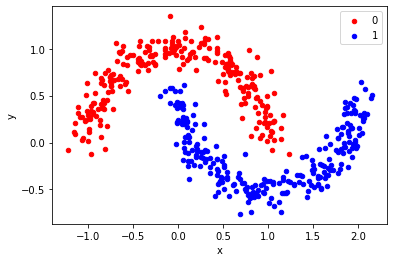

In [12]:
from sklearn.datasets.samples_generator import make_moons
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
# generate 2d classification dataset
n = 500
X, y = make_moons(n_samples=n, noise=0.1)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

datadict = {'X1': X[:,0],'X2' : X[:,1], 'target': y}
data = pd.DataFrame(data=datadict)


In [13]:
dof = 2
# Initialize weights
weights = np.random.normal(scale= 1/dof**.5, size=dof)
print(weights)
epochs = 2000
lr = 0.2

[0.68809121 0.46307165]


In [0]:
X = data.iloc[:, [0,1]].values
Y = data.iloc[:, 2].values

In [17]:
for e in range(epochs):
    delta_w = np.zeros(weights.shape)
    for x, y in zip(X, Y):
        pred = sigmoid(np.dot(x, weights))
        error = y - pred

        sigma = error * pred * (1 - pred)

        # error x gradient x inputs
        delta_w += sigma * x

    weights += lr * delta_w / n


    if e % (epochs / 20) == 0:
        Y_pred = sigmoid(np.dot(X, weights))
        loss = np.mean((Y_pred - Y) ** 2)
        print("Train loss: ", loss)



Train loss:  0.23832606346919133
Train loss:  0.16188206744270348
Train loss:  0.129863770747853
Train loss:  0.11454874845897253
Train loss:  0.10622782004241178
Train loss:  0.1012022293635473
Train loss:  0.09790880769033934
Train loss:  0.09561395826180268
Train loss:  0.09393904899174738
Train loss:  0.09267218858046243
Train loss:  0.09168664203680074
Train loss:  0.09090238779485317
Train loss:  0.0902666093107718
Train loss:  0.08974314374286493
Train loss:  0.08930645784375926
Train loss:  0.08893804697488276
Train loss:  0.08862419654592694
Train loss:  0.08835454268723744
Train loss:  0.08812111931823453
Train loss:  0.08791771086692217


In [0]:
Y_pred = sigmoid(np.dot(X, weights))
Y_pred = Y_pred > 0.5

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


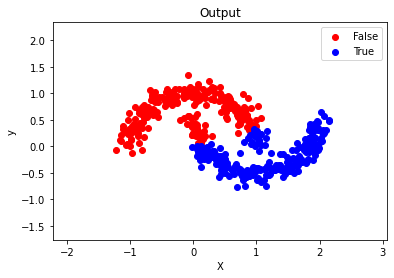

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X, Y_pred
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                  np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Output')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()